<a href="https://colab.research.google.com/github/Namyalg/ML/blob/master/LinearRegression_Revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import random, numpy as np

# Linear Regression

Consider you have a situation such mapping of points from x -> y, i.e., (x, y) pairs, can you identify a mapping or a function, when given any x, can produce a corresponding value of y ?


This example has a simple mapping of the (x, y) pairs such that y = 2*x, the task is to fit a curve that determines the relation between x and y as y = 2 * x


* In linear regression terms, consider a function y' = w*x + b, which is linear on the parameter w. Here, there is just one parameter, considering there is just one input x, and an intercept b. For simplicity, the intercept will be removed, and can be represented as y' = w * x


* Introducing the `cost` function or the relation between given data and the curve that we want to fit

```
y' or the estimated value = w * x
y is the actual value
The cost function is given as 0.5 / (number_of_samples) * summation((y' - y))^2
```

* Squaring is performed to ensure that the actual value of the loss is determined, say, if only the difference of `y` and `y'` were obtained, then it is possible that some cases could result in 0 or negative lossses, not capturing the exact loss, hence, the mean squared loss is used.

* It is divided by the number of examples, to prevent the cost function from having a very high value


```
y = 2 * x

y' = w * x

n = total number of aamples

C(w) = 0.5 / n * summation((w * x) - (2 * x)) ^ 2, summation across all the data points
````
The cost function is quadratic in nature with respect to x, thus, has the shape of the parabola

The objective is to MINIMIZE the cost function


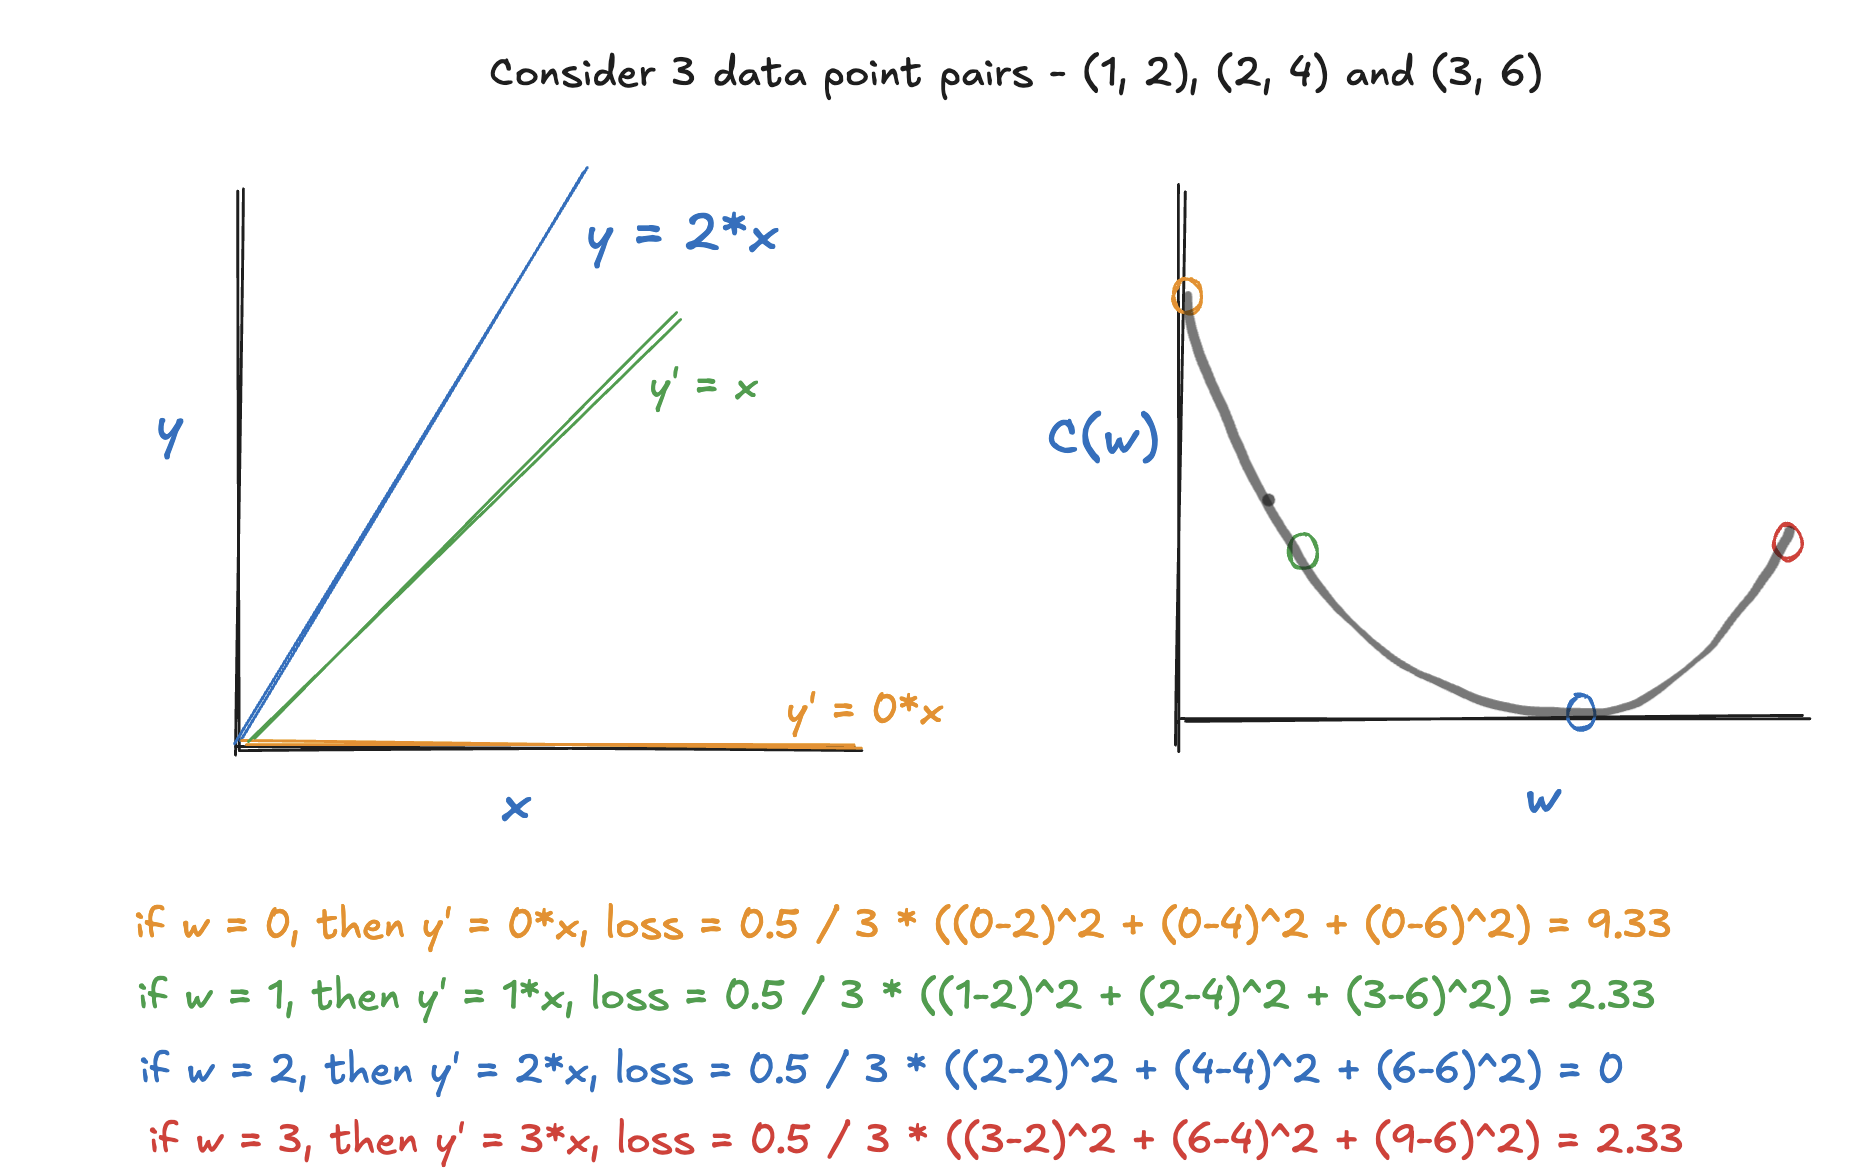

## Gradient descent and minimizing the cost function

`w` essentially has an infinite number of values that it can take. However, considering the `cost` function is a convex function, it can be said that there will be only one minima, which will correspond to the global minima and our objective is to find the value of `w` that corresponds to the minimum possible value of the cost function.

If the line segment between any two distinct points on the graph of the function lies above or on the graph between the two points, then it is considered as a convex function

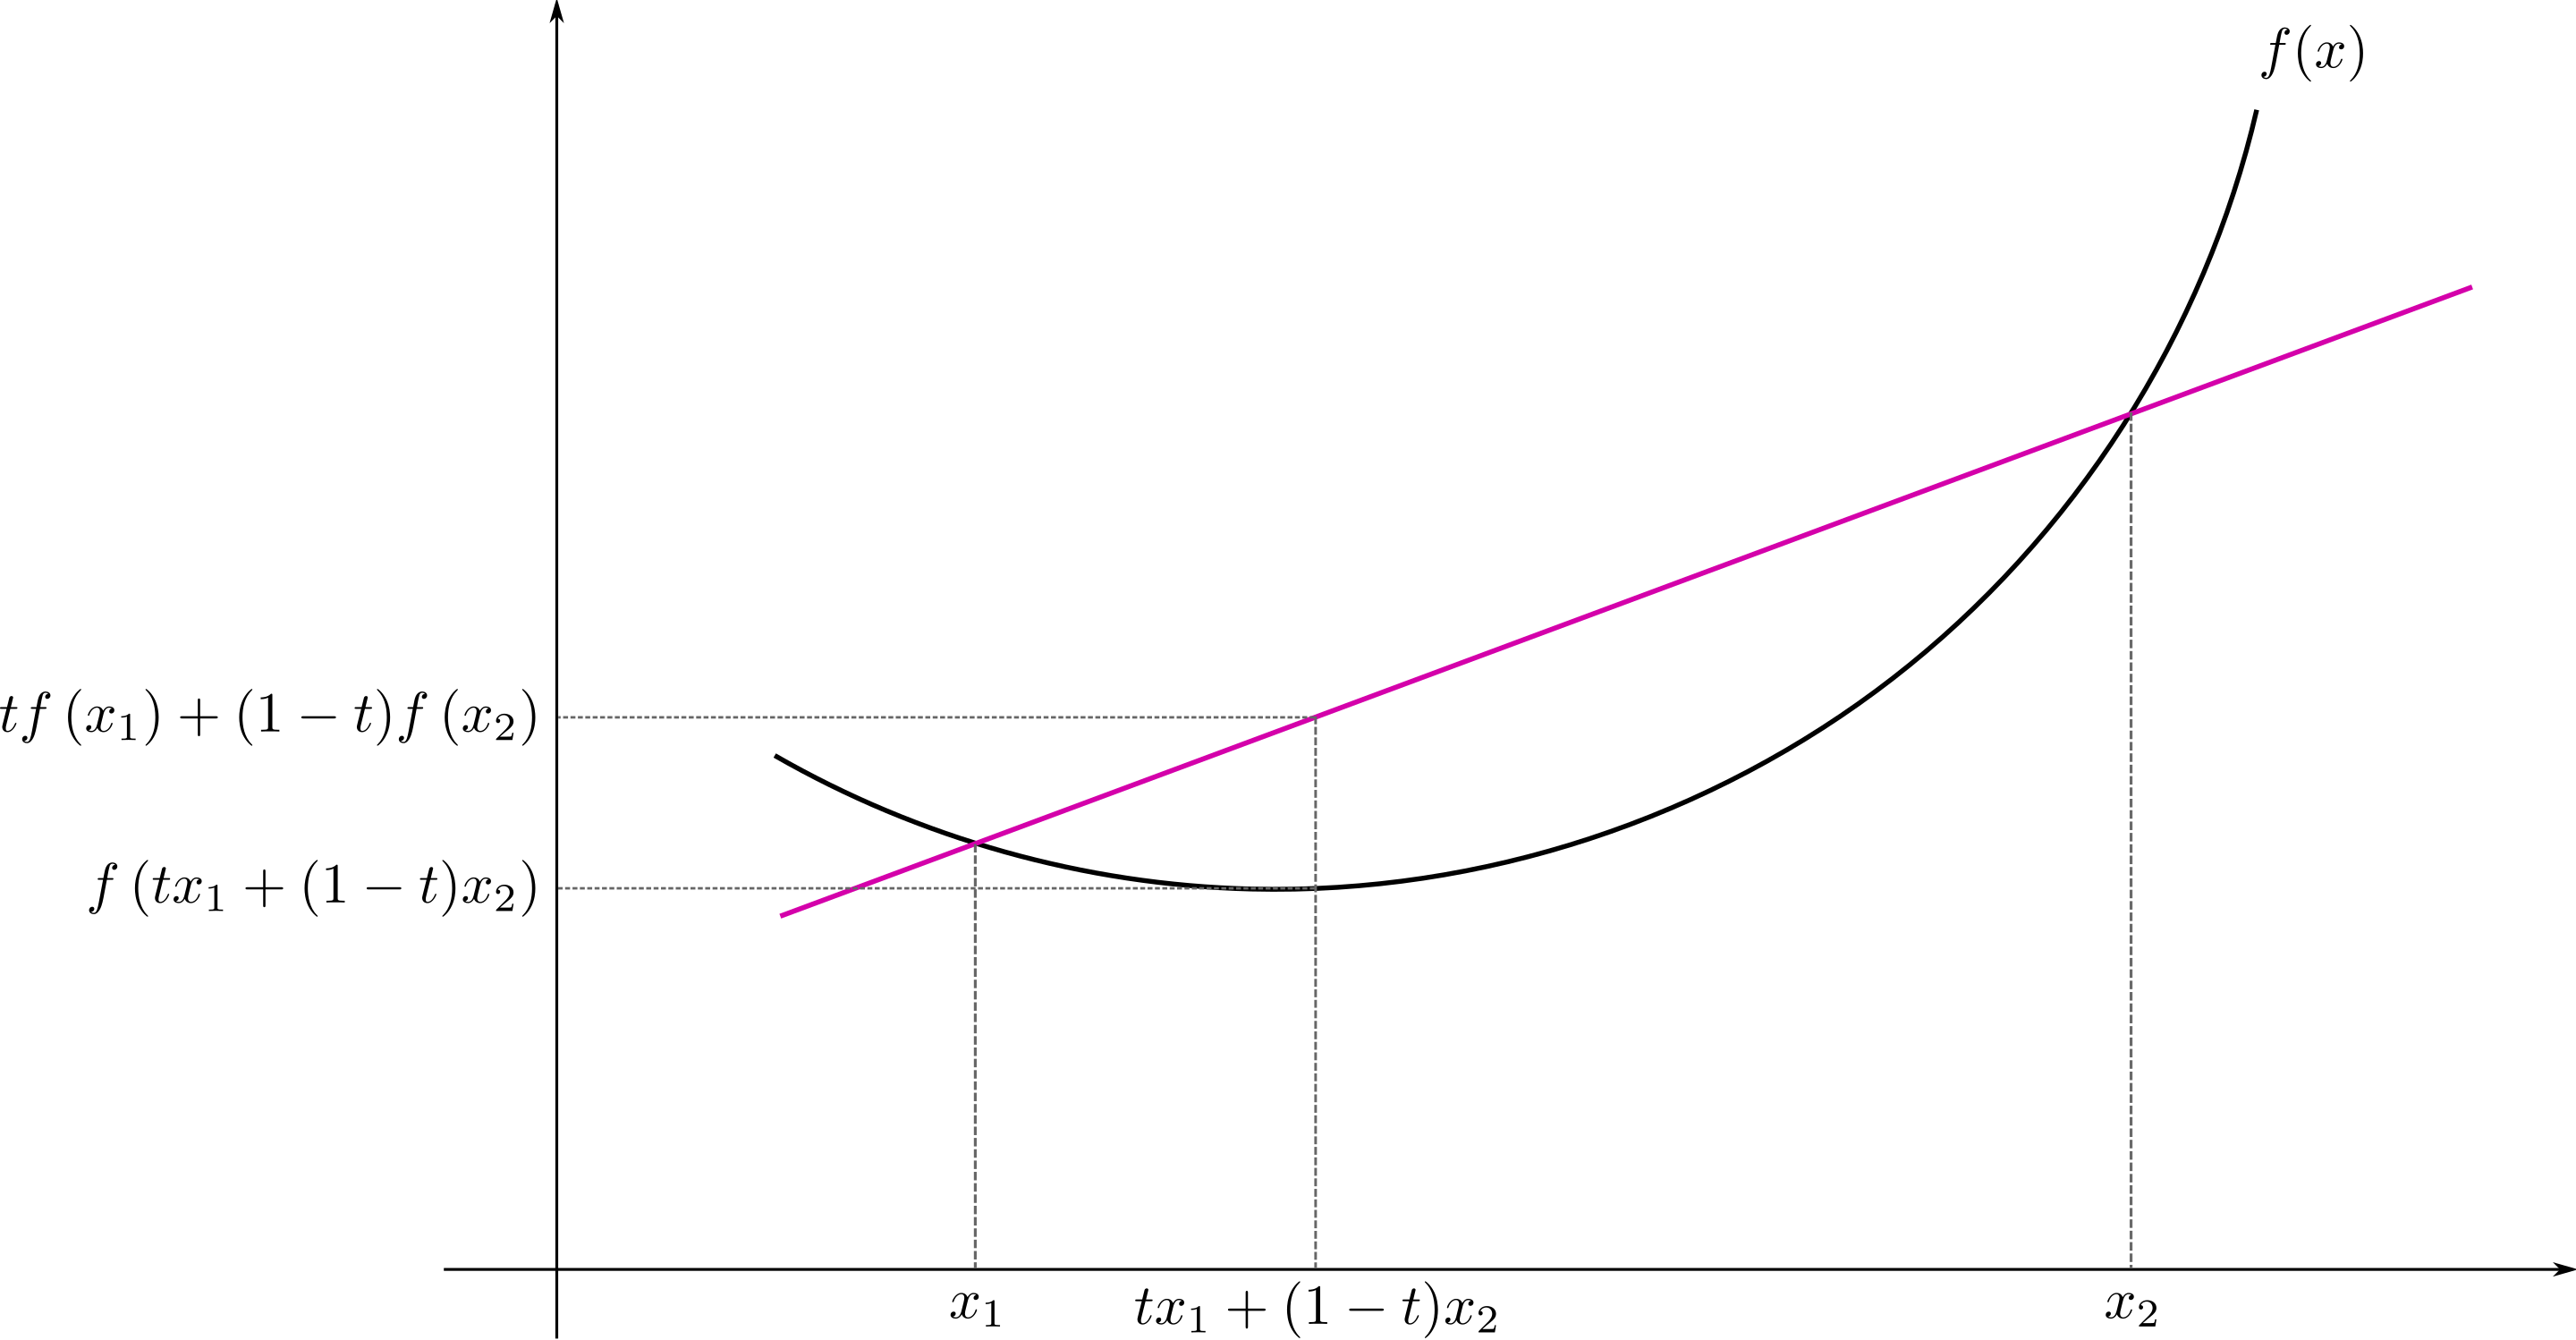

The following expression holds good here, where the value of `t` is greater than equal to `0` and less than or equal to `1` : image.png

Source - [Wikipedia](https://en.wikipedia.org/wiki/Convex_function)

#### Why does a convex function have only one minima, and how can you say that is the global minima?

From my perspective, an analysis of the following form can be used, consider the following curve that has 2 minima's

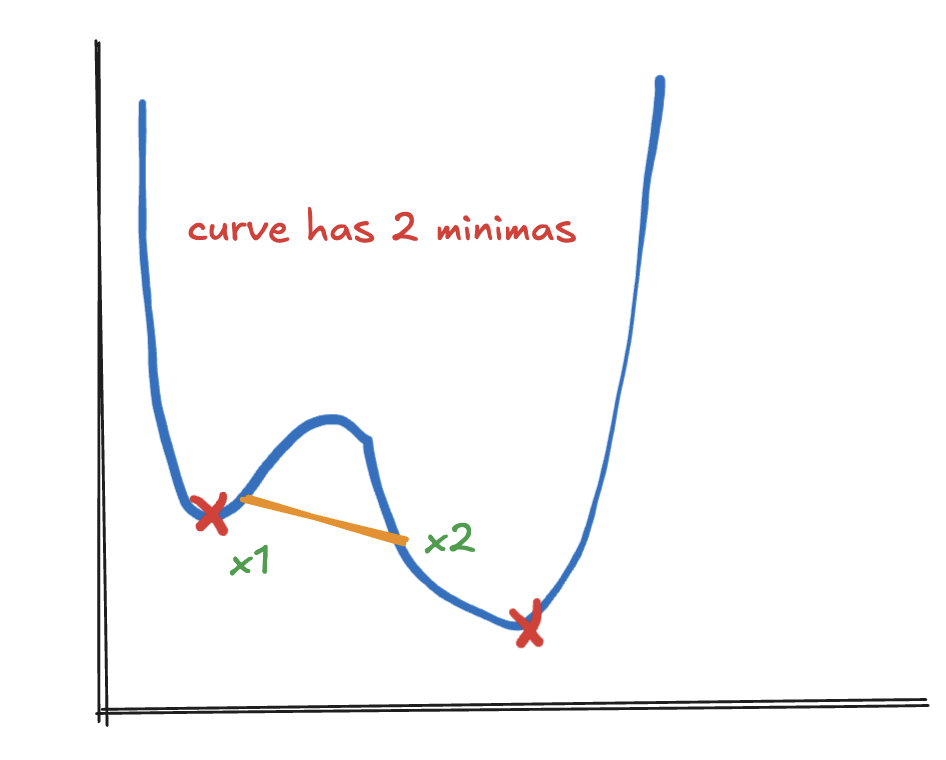


Consider 2 points `x1` and `x2`, however, this does not obey the property of a convex function as described above, hence, this curve is not `convex`. From this, it can be concluded, that a convex curve, will only have one minima, and will correspond to the global minima. Now with this assumption, it is clear, that when we run gradient descent to find the lowest point on the curve, considered as best effort

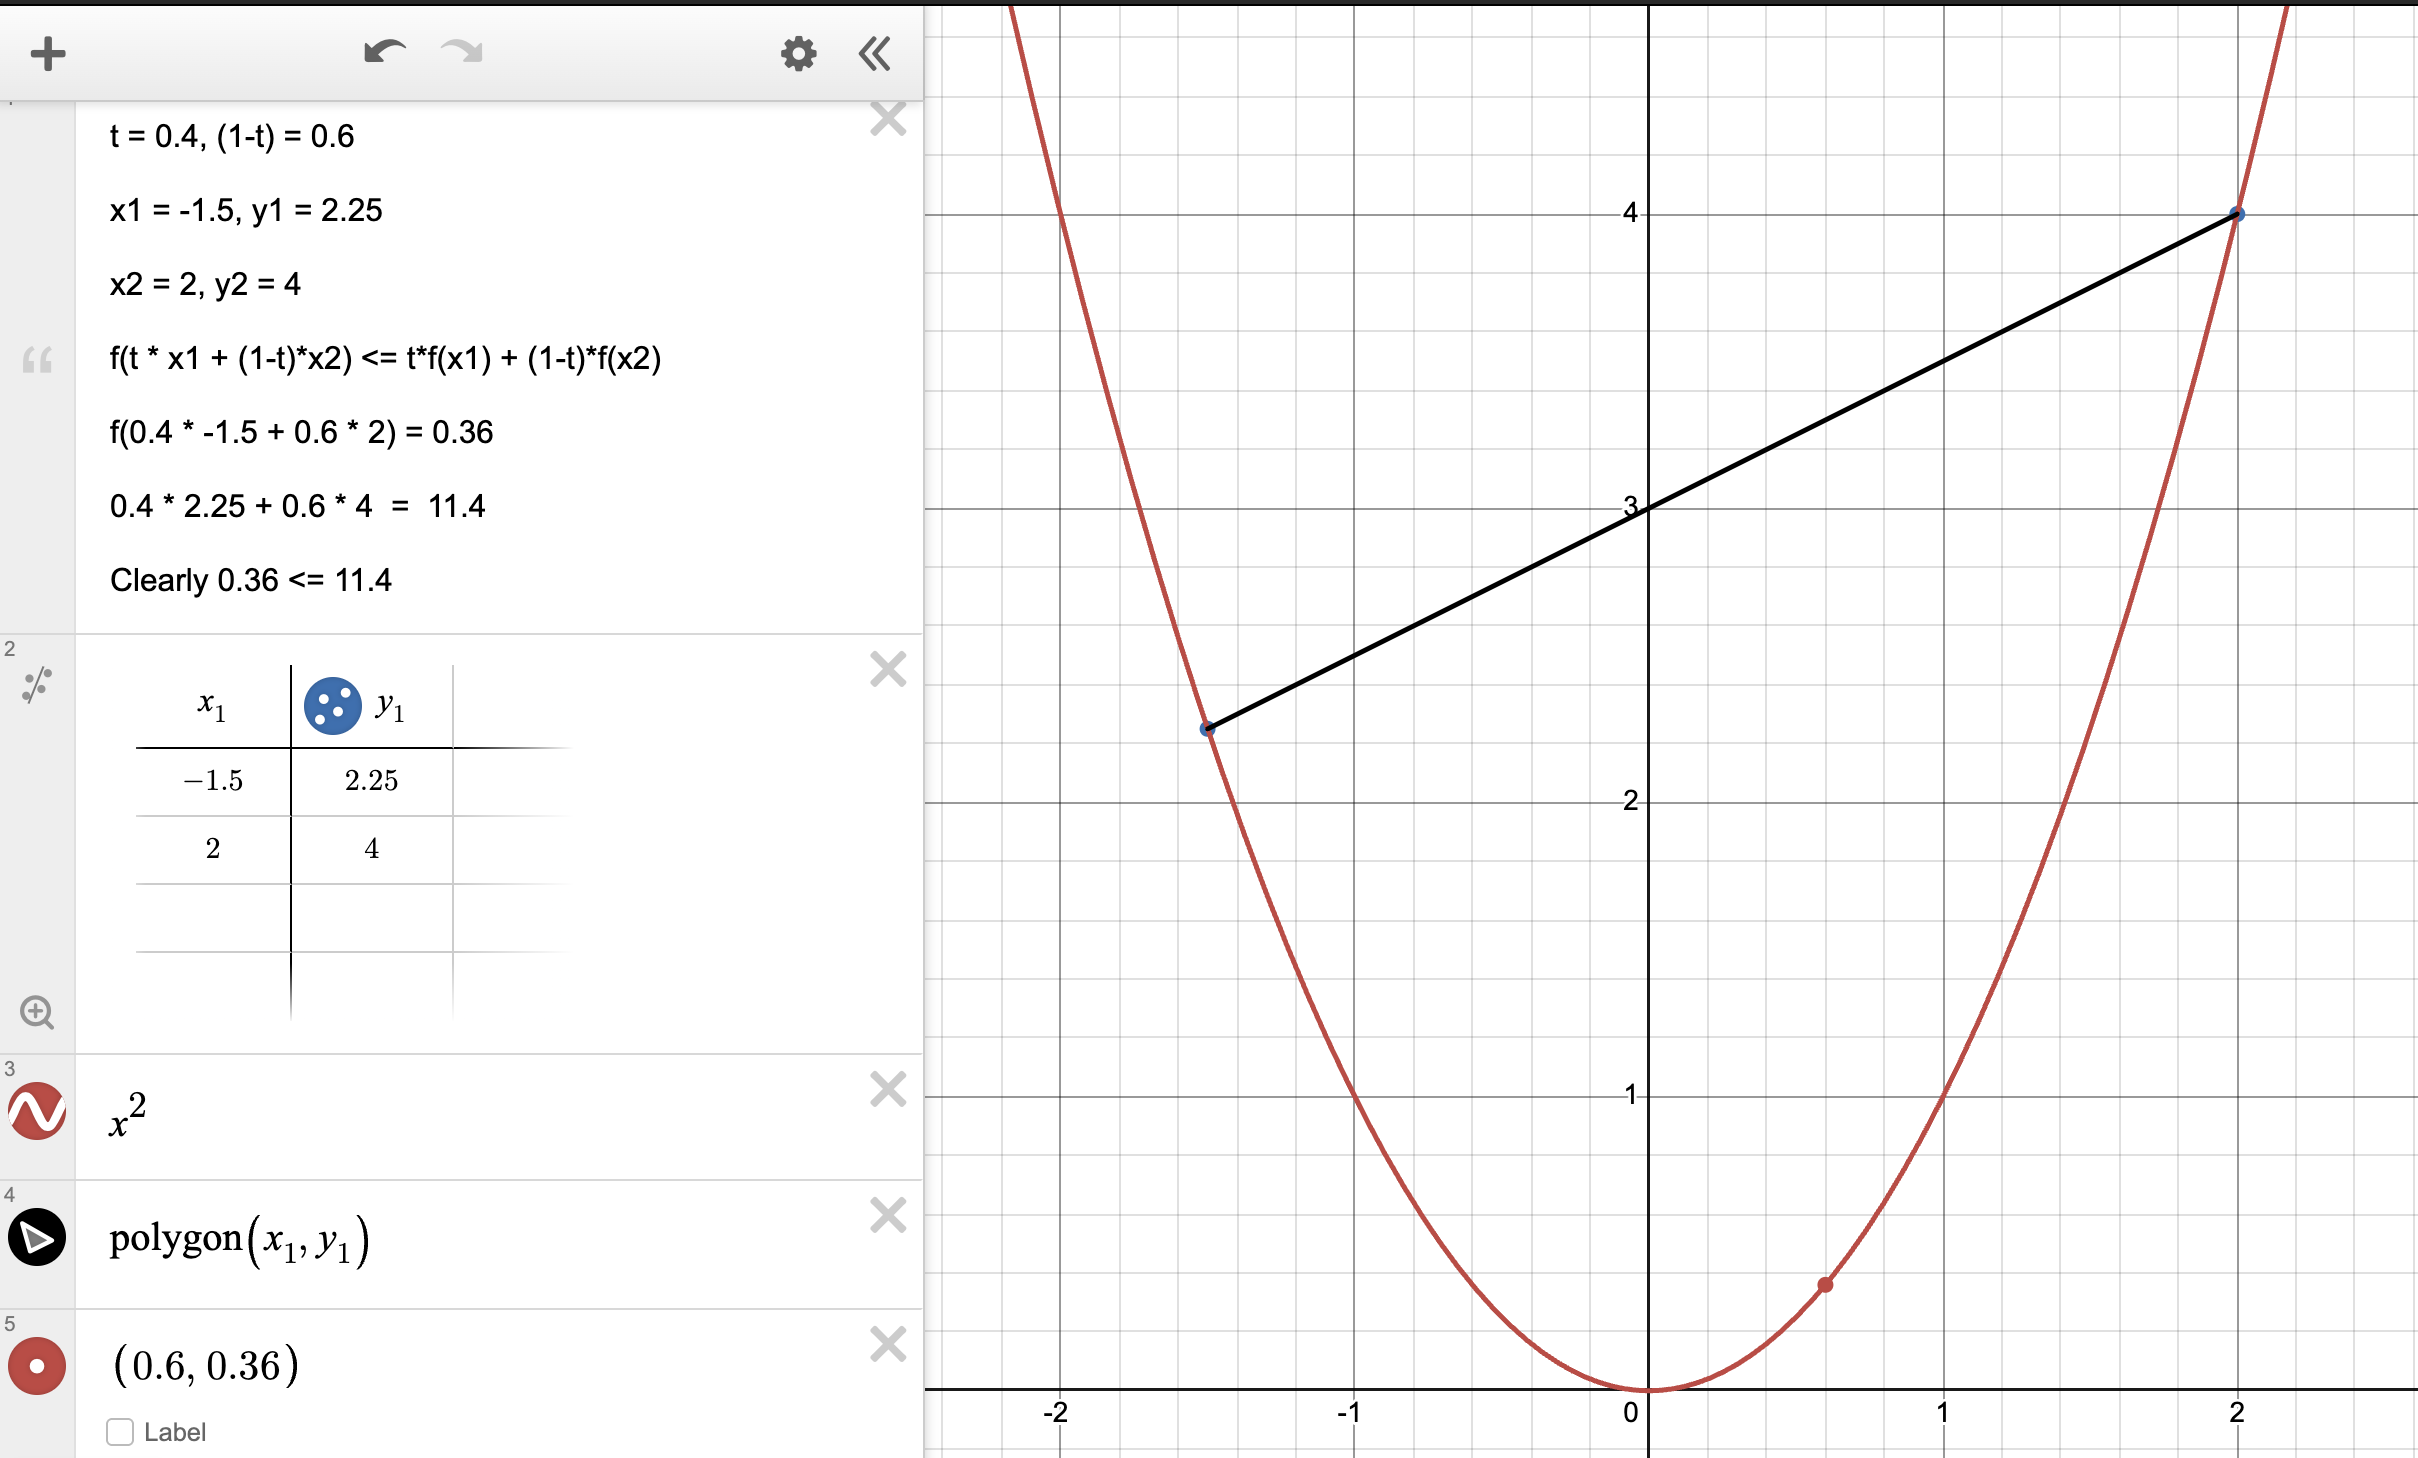

The idea in gradient descent, is to "descend" in the direction of maximum gradient so as to reach the minimum value the function can take. In this case, since the equation is parameterized on `w`, the value of `w` will be modelled to change based on the input from the `cost` function

`w` = `w` - some_scaling_factor * differential of the cost function

The scaling factor is called the learning rate and is can take varying values

The direction of descent is determined by the derivative. If the gradient is positive, it means to say the value of `w` should be decremented so as to come closer to the minimum loss, on the other hand, if the value is positive, then the value of `w` should be incremented so as to come closer to the minimum possible loss.

For example, for the graph `y = x^2`, the value of the derivative when x < 0 is -ve, indicating that the minima is greater than the current value of `w`, and when x > 0, the derivative is +ve, indicating that the minima is lesser than the current value of `w`.

Thus, in short, gradient descent is the guiding force, it tells you in which direction you should travel to reach the destination which results in a minimum loss.


```
C(w) = 0.5 / n * ((w * x) - (2 * x)) ^ 2

del (C(w) / w) = (0.5 */ N) * 2 * summation(((w * x) - y) * x)

= 1 / N * summation((y' - y) * x)

```




In [26]:
def compute_loss(x, y_estimate, y):
  return 0.5 / len(y) * np.sum(np.square(y_estimate - y))

def sum_gradient(x, y_estimate, y):
  gradient = 0
  number_of_samples = len(y)
  for idx, value in enumerate(x):
    gradient += (y_estimate[idx] - y[idx]) * value
  return 1 / number_of_samples * gradient

def fit_the_curve(x, y, learning_rate=0.001, iterations=50):
  # Random value initialised
  w = random.random()
  print("Value of w before gradient descent", w)
  loss = []
  for _ in range(iterations):
    y_estimate = w * x
    loss.append(compute_loss(x, y_estimate, y))
    w = w - sum_gradient(x, y_estimate, y) * learning_rate

  print(f'The best fit curve is y = {w} * x')
  plot_curve(x, y, y_estimate, f'y = {w} * x', loss, iterations)

def plot_curve(x, y_real, y_estimate, curve_fit, loss, iterations):
  fig, axs = plt.subplots(1, 2, figsize=(10, 4)) # figsize adjusts the figure size
  axs[0].plot(x, y, label='Actual curve')
  axs[0].plot(x, y_estimate, label=curve_fit)
  axs[0].set_title('Approximated using Linear Regression')
  axs[0].legend()
  axs[0].grid(True)


  axs[1].plot(np.arange(0, iterations), loss)
  # Add labels, title, and legend
  axs[1].set_title('Loss')
  # Display the plot
  axs[1].grid(True) # Optional: add a grid


Value of w before gradient descent 0.7916436165848575
The best fit curve is y = 3.029312206212121 * x


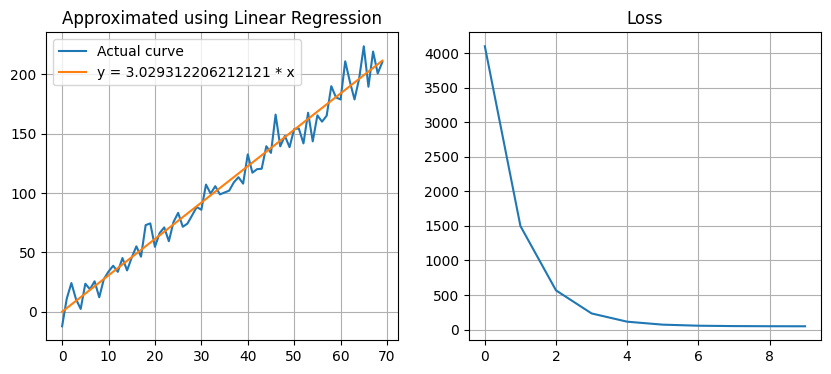

In [27]:
# Generate sample data with whole numbers
x = np.arange(0, 70)
y = 3 * x + 2 + np.random.normal(0, 10, len(x))
fit_the_curve(x, y, learning_rate=0.001, iterations=10)

Value of w before gradient descent 0.02943303352640747
The best fit curve is y = 156.38770934146027 * x


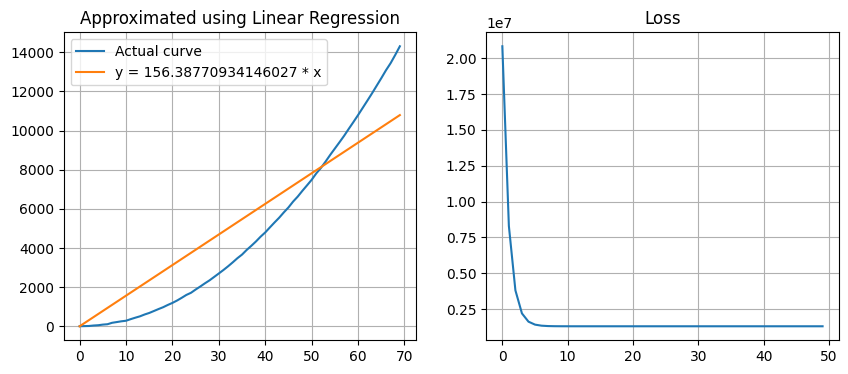

In [28]:
# Generate sample data with whole numbers
x = np.arange(0, 70)
y = 3 * x * x + 2 + np.random.normal(0, 10, len(x))
fit_the_curve(x, y)

Value of w before gradient descent 0.7499285618928405
The best fit curve is y = -0.03169498702511723 * x


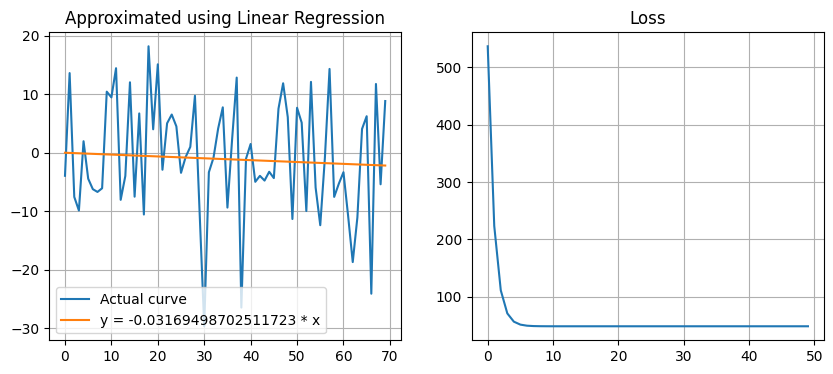

In [29]:
# Generate sample data with whole numbers
x = np.arange(0, 70)
y = np.sin(x) + np.random.normal(0, 10, len(x))
fit_the_curve(x, y)